In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import mapclassify as mc
import contextily

In [2]:
# read urban and rural data
urban_datazone=pd.read_csv('Data/SmallUser.csv')

/var/folders/74/ch5llxvd3klg6n6_l6_s335w0000gn/T/ipykernel_22405/4241215005.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  urban_datazone=pd.read_csv('Data/SmallUser.csv')


In [3]:
urban_datazone.columns

Index(['Postcode', 'PostcodeDistrict', 'PostcodeSector', 'DateOfIntroduction',
       'DateOfDeletion', 'GridReferenceEasting', 'GridReferenceNorthing',
       'Latitude', 'Longitude', 'SplitIndicator', 'CouncilArea2019Code',
       'UKParliamentaryConstituency2005Code',
       'ScottishParliamentaryRegion2021Code',
       'ScottishParliamentaryConstituency2021Code', 'ElectoralWard2022Code',
       'HealthBoardArea2019Code', 'HealthBoardArea2006Code',
       'HealthBoardArea1995Code', 'IntegrationAuthority2019Code',
       'OutputArea2011Code', 'OutputArea2001Code', 'OutputArea1991Code',
       'DataZone2011Code', 'DataZone2001Code', 'IntermediateZone2011Code',
       'IntermediateZone2001Code', 'CensusHouseholdCount2011',
       'CensusPopulationCount2011', 'CensusHouseholdCount2001',
       'CensusPopulationCount2001', 'CensusHouseholdCount1991',
       'CensusPopulationCount1991',
       'ScottishIndexOfMultipleDeprivation2020Rank', 'LAU2019Level1Code',
       'ITL2021Level2Code', '

In [4]:
# keep useful columns
urban_datazone=urban_datazone[['DataZone2011Code','UrbanRural6Fold2020Code']]

# delete duplicated rows
urban_datazone=urban_datazone.drop_duplicates()

In [5]:
urban_datazone

,DataZone2011Code,UrbanRural6Fold2020Code
0,S01006853,5
7,S01006514,1
12,S01006513,1
16,S01006516,1
25,S01006515,5
...,...,...
193160,S01012409,6
193164,S01012408,6
193212,S01012406,6
193228,S01012411,6


In [6]:
# read files
scot_simd=gpd.read_file('Data/SG_SIMD_2020/SG_SIMD_2020.shp')
gla_boundary=gpd.read_file('Data/GlasgowBdry_2011/GlasgowBdry_2011.shp')


In [7]:
# reproject it to spherical mercato
scot_simd.to_crs(epsg=3857, inplace=True)
gla_boundary.to_crs(epsg=3857, inplace=True)

In [8]:
# select data zones in Glasgow
gla_simd=scot_simd.loc[scot_simd['LAName']=='Glasgow City']

In [9]:
# merge SIMD with urban codes data
gla_simd= gla_simd.merge(urban_datazone, left_on='DataZone',right_on='DataZone2011Code', how='left')

In [10]:
# the rows increased, which means some data zones are partially in rural area
gla_simd[gla_simd.duplicated('DataZone2011Code')]

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code
10,S01009767,Darnley North - 04,Glasgow City,1099,738,1962,2,3,6,29,...,89,3,17%,1%,1486.0,17004.466933,3.069404e+06,"POLYGON ((-485786.679 7519565.774, -485639.740...",S01009767,1
37,S01009793,Pollok South and West - 02,Glasgow City,1342,867,5229,4,8,15,75,...,97,10,11%,1%,3017.0,5307.901854,1.095028e+06,"POLYGON ((-486355.951 7525018.460, -486366.424...",S01009793,5
217,S01009972,Carmunnock South - 04,Glasgow City,880,512,2098,2,4,7,31,...,101,9,12%,1%,2609.0,20628.646934,4.898133e+06,"POLYGON ((-474123.839 7520598.165, -474111.491...",S01009972,5
225,S01009979,Glenwood South - 07,Glasgow City,518,299,138,1,1,1,2,...,103,4,21%,1%,901.0,3680.176673,3.160827e+05,"POLYGON ((-469794.672 7519279.974, -469791.148...",S01009979,5
335,S01010088,Baillieston East - 01,Glasgow City,1916,1339,5520,4,8,16,80,...,43,8,5%,1%,5292.0,12134.663939,2.504590e+06,"POLYGON ((-454857.341 7529024.492, -454649.963...",S01010088,1
339,S01010091,Baillieston East - 04,Glasgow City,963,699,3917,3,6,12,57,...,101,5,12%,1%,2979.0,10404.213993,2.881871e+06,"POLYGON ((-458391.600 7527095.488, -458423.540...",S01010091,1
358,S01010109,Easterhouse East - 05,Glasgow City,907,649,980,1,2,3,15,...,174,41,24%,6%,380.0,13896.703702,3.668592e+06,"POLYGON ((-454260.509 7535010.353, -454203.179...",S01010109,5
367,S01010117,"Garthamlock, Auchinlea and Gartloch - 05",Glasgow City,1401,990,5019,4,8,15,72,...,80,17,12%,3%,2201.0,22049.305723,5.161941e+06,"POLYGON ((-458093.545 7535826.534, -458024.538...",S01010117,1
373,S01010122,North Barlanark and Easterhouse South - 05,Glasgow City,511,373,5,1,1,1,1,...,105,14,25%,3%,447.5,4359.120819,3.657107e+05,"POLYGON ((-458589.317 7532305.128, -458631.559...",S01010122,5
430,S01010178,Riddrie and Hogganfield - 07,Glasgow City,1067,668,242,1,1,1,4,...,196,21,19%,2%,1051.0,6127.463478,1.075728e+06,"POLYGON ((-464054.633 7534770.712, -463986.843...",S01010178,5


In [11]:
# to ensure that the research is conducted based on urban area, I excluded those data zones have partially been defined as rural
# abtain the code of data zones whose urban areal code are 5

rural_datazone=gla_simd['DataZone'][gla_simd['UrbanRural6Fold2020Code'] == 5].tolist()


In [12]:
gla_simd = gla_simd[~gla_simd['DataZone'].isin(rural_datazone)]

In [13]:
gla_simd_oa_travel_all=gpd.read_file('Data/gla_simd_oa_travel_all_output.shp')

## 5 Two statistics of accessibility

### 5.1 Percentage of Population Living In 20min Neighborhood

#### 5.1.1 Glasgow Output Area average travel time

In [14]:
gla_simd_oa_travel_all.rename(columns={'average_tr': 'average_travel_time','all_reside':'all_residents'}, inplace=True)

In [15]:
gla_simd_oa_travel_all

,index,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,SAPE2017,WAPE2017,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone20,UrbanRural,OA_index,average_travel_time,geometry
0,5,56,0.04,1400.0,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,5,NaN,"POLYGON ((-478041.925 7535912.795, -478044.551..."
1,372,83,0.60,138.3,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,372,NaN,"POLYGON ((-477812.746 7536057.997, -477779.324..."
2,1093,100,0.28,357.1,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,1093,NaN,"POLYGON ((-477855.521 7536163.617, -477859.986..."
3,3947,116,3.76,30.9,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,3947,16.25,"POLYGON ((-477762.928 7535897.314, -477785.278..."
4,5389,53,1.27,41.7,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,5389,NaN,"POLYGON ((-478083.574 7536011.531, -478221.418..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,7812,50,0.25,200.0,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7812,9.00,"POLYGON ((-480377.268 7532188.849, -480379.009..."
5399,7813,99,0.32,309.4,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7813,11.00,"POLYGON ((-480250.516 7532096.865, -480187.529..."
5400,7814,66,0.21,314.3,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7814,10.00,"POLYGON ((-480218.229 7532153.615, -480250.516..."
5401,7898,78,0.17,458.8,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7898,10.00,"POLYGON ((-480326.619 7532165.041, -480325.529..."


In [16]:
gla_simd_oa_20 = gla_simd_oa_travel_all[gla_simd_oa_travel_all['average_travel_time']<=20]
gla_simd_oa_out_20 = gla_simd_oa_travel_all[
    (gla_simd_oa_travel_all['average_travel_time']>20)|(gla_simd_oa_travel_all['average_travel_time'].isna())]

In [17]:
inaccessible_pop = gla_simd_oa_out_20['all_residents'].sum()
print(inaccessible_pop, 'residents living in Glasgow can not access all necessary amenities by 20 minutes walk')

139917 residents living in Glasgow can not access all necessary amenities by 20 minutes walk


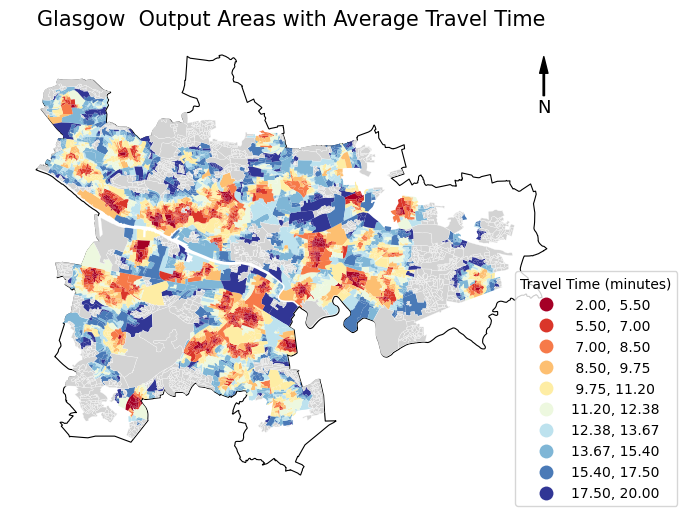

In [18]:
g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd_oa_20_plot = gla_simd_oa_20.plot(ax=ax,column="average_travel_time", 
                                          cmap="RdYlBu", scheme="natural_breaks", k=10, 
                                          legend=True)
gla_simd_oa_out_20.plot(ax=ax,color='lightgray',edgecolor='white',linewidth=0.2)

ax.set_title('Glasgow  Output Areas with Average Travel Time', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Travel Time (minutes)'
gla_simd_oa_20_plot.get_legend().set_title(legend_title)

gla_simd_oa_20_plot.get_legend().set_bbox_to_anchor((1.2,0.5))

# Show the plot
plt.show()

#### 5.1.2 Distribution of percentage of population can access amenities within 20min

In [19]:
dz_list = gla_simd_oa_travel_all['DataZone'].unique().tolist()

In [20]:
per_pop_20min = pd.DataFrame()
for dz in dz_list:
    datazone = gla_simd_oa_travel_all[gla_simd_oa_travel_all['DataZone']==dz]
    sum_pop = datazone['all_residents'].sum()
    OA_accessible = datazone[datazone['average_travel_time'].notna()]
    OA_accessible = OA_accessible[OA_accessible['average_travel_time']<= 20]
    sum_pop_acc = OA_accessible['all_residents'].sum()
    per_acc = round(sum_pop_acc/sum_pop,2)
    new_row = {'Datazone':dz,'percentage_of_pop':per_acc}
    per_pop_20min = pd.concat([per_pop_20min, pd.DataFrame([new_row])], ignore_index=True)
    

In [21]:
per_pop_20min

,Datazone,percentage_of_pop
0,S01010362,0.28
1,S01010028,1.00
2,S01010351,0.00
3,S01010206,0.00
4,S01010183,1.00
...,...,...
727,S01010289,1.00
728,S01009774,0.00
729,S01009773,0.00
730,S01010190,0.00


In [22]:
gla_simd_oa_travel_all_pop = pd.merge(gla_simd,per_pop_20min,left_on='DataZone',right_on='Datazone',how='left')

In [23]:
gla_simd_oa_travel_all_pop

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,Datazone,percentage_of_pop
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,S01009758,0.18
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,S01009759,1.00
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,S01009760,0.87
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,S01009761,0.73
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,S01009762,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,S01010499,Drumry East - 04,Glasgow City,738,442,28,1,1,1,1,...,28%,5%,258.0,2645.822578,244941.600066,"POLYGON ((-486818.740 7541516.012, -486711.627...",S01010499,1,S01010499,1.00
728,S01010500,Drumry West - 01,Glasgow City,1022,664,420,1,1,2,7,...,23%,0%,798.0,2793.013024,218303.033646,"POLYGON ((-487264.882 7540811.565, -487241.761...",S01010500,1,S01010500,0.82
729,S01010501,Drumry West - 02,Glasgow City,1119,748,974,1,2,3,14,...,17%,1%,1530.0,3413.705002,233830.299216,"POLYGON ((-487081.785 7541498.030, -487109.039...",S01010501,1,S01010501,1.00
730,S01010502,Drumry West - 03,Glasgow City,806,563,2146,2,4,7,31,...,17%,0%,1525.5,2732.532929,241424.225068,"POLYGON ((-488040.807 7542102.534, -488021.354...",S01010502,1,S01010502,0.53


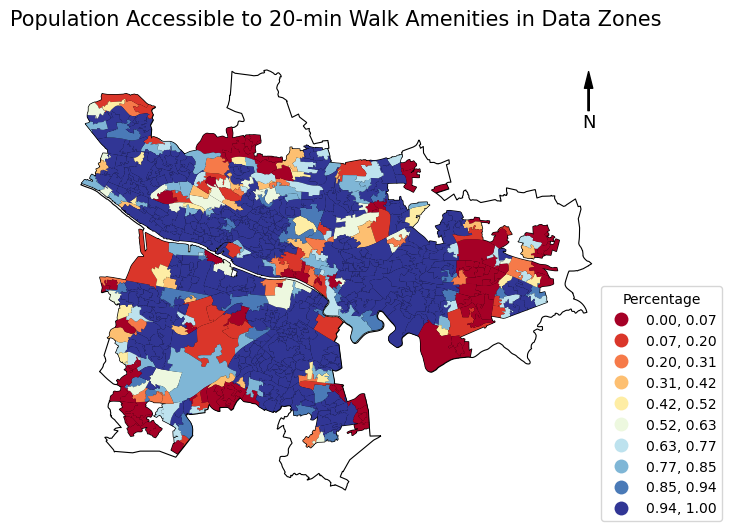

In [24]:
g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd.plot(ax=ax,color=None, edgecolor='black',linewidth=1)
gla_simd_oa_travel_all_pop_plot=gla_simd_oa_travel_all_pop.plot(ax=ax,column="percentage_of_pop", cmap="RdYlBu", scheme="natural_breaks", k=10, legend=True)


ax.set_title('Population Accessible to 20-min Walk Amenities in Data Zones', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Percentage'
gla_simd_oa_travel_all_pop_plot.get_legend().set_title(legend_title)

gla_simd_oa_travel_all_pop_plot.get_legend().set_bbox_to_anchor((1.2,0.5))

### 5.2 Population Weighted Average Walking Time to Amenities

#### 5.2.1  Replace null value with max travel time

In [25]:
gla_simd_oa_travel_all['average_travel_time'].isnull().sum()

1138

In [26]:
gla_simd_oa_travel_all['average_travel_time'].max()

47.666666666666664

In [27]:
# replace null value with max value
gla_simd_oa_travel_all_ntom =  gla_simd_oa_travel_all.copy()

gla_simd_oa_travel_all_ntom['average_travel_time'].fillna(gla_simd_oa_travel_all_ntom['average_travel_time'].max(), inplace=True)

In [28]:
gla_simd_oa_travel_all_ntom.to_file('Data/gla_simd_oa_travel_all_ntom_output.shp', driver='ESRI Shapefile')

/var/folders/74/ch5llxvd3klg6n6_l6_s335w0000gn/T/ipykernel_22405/3780699977.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gla_simd_oa_travel_all_ntom.to_file('Data/gla_simd_oa_travel_all_ntom_output.shp', driver='ESRI Shapefile')


In [29]:
gla_simd_oa_travel_all_ntom.head()

,index,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,SAPE2017,WAPE2017,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone20,UrbanRural,OA_index,average_travel_time,geometry
0,5,56,0.04,1400.0,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.46982,80326.479612,S01010362,1,5,47.666667,"POLYGON ((-478041.925 7535912.795, -478044.551..."
1,372,83,0.60,138.3,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.46982,80326.479612,S01010362,1,372,47.666667,"POLYGON ((-477812.746 7536057.997, -477779.324..."
2,1093,100,0.28,357.1,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.46982,80326.479612,S01010362,1,1093,47.666667,"POLYGON ((-477855.521 7536163.617, -477859.986..."
3,3947,116,3.76,30.9,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.46982,80326.479612,S01010362,1,3947,16.250000,"POLYGON ((-477762.928 7535897.314, -477785.278..."
4,5389,53,1.27,41.7,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.46982,80326.479612,S01010362,1,5389,47.666667,"POLYGON ((-478083.574 7536011.531, -478221.418..."


#### 5.2.2 Calculate population weight averagte travel time

In [30]:
dz_list_test = ['S01010362','S01010392']

In [31]:
dz_list = gla_simd['DataZone'].tolist()

In [32]:
gla_simd_oa_travel_all_ntom

,index,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,SAPE2017,WAPE2017,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone20,UrbanRural,OA_index,average_travel_time,geometry
0,5,56,0.04,1400.0,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,5,47.666667,"POLYGON ((-478041.925 7535912.795, -478044.551..."
1,372,83,0.60,138.3,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,372,47.666667,"POLYGON ((-477812.746 7536057.997, -477779.324..."
2,1093,100,0.28,357.1,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,1093,47.666667,"POLYGON ((-477855.521 7536163.617, -477859.986..."
3,3947,116,3.76,30.9,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,3947,16.250000,"POLYGON ((-477762.928 7535897.314, -477785.278..."
4,5389,53,1.27,41.7,617,S01010362,Wyndford - 05,Glasgow City,831,645,...,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,5389,47.666667,"POLYGON ((-478083.574 7536011.531, -478221.418..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,7812,50,0.25,200.0,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7812,9.000000,"POLYGON ((-480377.268 7532188.849, -480379.009..."
5399,7813,99,0.32,309.4,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7813,11.000000,"POLYGON ((-480250.516 7532096.865, -480187.529..."
5400,7814,66,0.21,314.3,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7814,10.000000,"POLYGON ((-480218.229 7532153.615, -480250.516..."
5401,7898,78,0.17,458.8,647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,7898,10.000000,"POLYGON ((-480326.619 7532165.041, -480325.529..."


In [33]:
average_weight_trave_time = pd.DataFrame()
for dz in dz_list:
    new_df = gla_simd_oa_travel_all_ntom[gla_simd_oa_travel_all_ntom['DataZone']==dz]
    lengh = len(new_df)
    average_weight_trave_time_OA = 0
    for i in range(lengh):
        ndf=new_df.iloc[i,[1,-2]]
        average_weight_trave_time_OA += ndf['all_residents']*ndf['average_travel_time']
    average_weight_trave_time_number = average_weight_trave_time_OA/new_df['all_residents'].sum()
    new_row = {'DataZone':dz,'weight_average_travel_time':average_weight_trave_time_number}
    average_weight_trave_time = pd.concat([average_weight_trave_time, pd.DataFrame([new_row])], ignore_index=True)
   

In [34]:
average_weight_trave_time

,DataZone,weight_average_travel_time
0,S01009758,41.749721
1,S01009759,7.358137
2,S01009760,13.738708
3,S01009761,21.127839
4,S01009762,4.638769
...,...,...
727,S01010499,6.883178
728,S01010500,18.514533
729,S01010501,11.579203
730,S01010502,30.665421


In [35]:
# merge dataframe with information of travel time with GeoDataFrame
average_weight_trave_time = pd.merge(gla_simd,average_weight_trave_time,left_on='DataZone',right_on='DataZone',how='left')

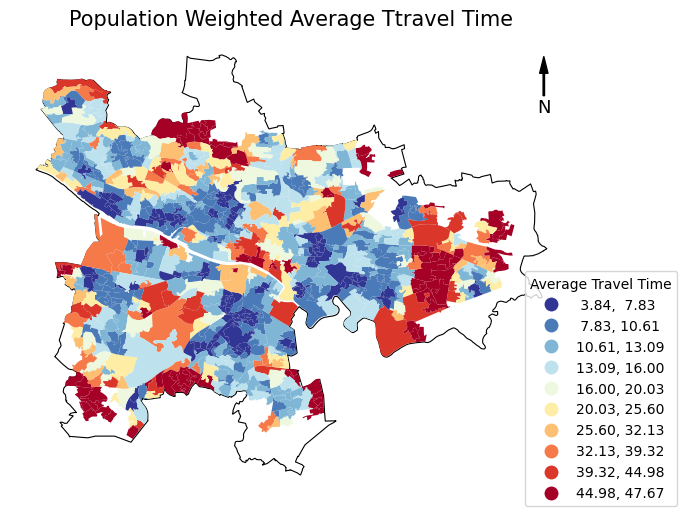

In [36]:
# visualize the distribution of population weighted average travel time of each Data Zone
g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
average_weight_trave_time_plot=average_weight_trave_time.plot(ax=ax,column="weight_average_travel_time", 
                                          cmap="RdYlBu_r", scheme="natural_breaks", k=10, legend=True)

ax.set_title('Population Weighted Average Ttravel Time', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Average Travel Time'
average_weight_trave_time_plot.get_legend().set_title(legend_title)

average_weight_trave_time_plot.get_legend().set_bbox_to_anchor((1.2,0.5))

# Show the plot
plt.show()

## 6 Social equity assessment

### 6.1 Gini Index

In [37]:
import numpy as np

def gini_coefficient(data):
    # sort rows
    sorted_data = np.sort(data)
    n = data.shape[0]
    numerator = np.sum((2 * np.arange(1, n+1) - n - 1) * sorted_data)
    denominator = n * np.sum(sorted_data)
    
    # calculate gini index
    gini = numerator / denominator
    
    return gini

In [38]:
gini_coeff_PP20min = gini_coefficient(gla_simd_oa_travel_all_pop['percentage_of_pop'])

gini_coeff_PP20min

0.23134039316472638

In [39]:
gini_coeff_PATT = gini_coefficient(average_weight_trave_time['weight_average_travel_time'])

gini_coeff_PATT

0.37268010362671855

Gini Index: 0 represents perfect equality, indicating that everyone has the same income or the variable is evenly distributed among the population.
1 represents perfect inequality, indicating that one individual or group possesses all the income or the variable, and others have none.

### 6.2 Spearmam's Rank Correlation

#### 6.2.1 Transfer percentage of population into rank

In [40]:
gla_simd_oa_travel_all_pop_category = gla_simd_oa_travel_all_pop.copy()

In [41]:
gla_simd_oa_travel_all_pop_category

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,Datazone,percentage_of_pop
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,S01009758,0.18
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,S01009759,1.00
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,S01009760,0.87
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,S01009761,0.73
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,S01009762,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,S01010499,Drumry East - 04,Glasgow City,738,442,28,1,1,1,1,...,28%,5%,258.0,2645.822578,244941.600066,"POLYGON ((-486818.740 7541516.012, -486711.627...",S01010499,1,S01010499,1.00
728,S01010500,Drumry West - 01,Glasgow City,1022,664,420,1,1,2,7,...,23%,0%,798.0,2793.013024,218303.033646,"POLYGON ((-487264.882 7540811.565, -487241.761...",S01010500,1,S01010500,0.82
729,S01010501,Drumry West - 02,Glasgow City,1119,748,974,1,2,3,14,...,17%,1%,1530.0,3413.705002,233830.299216,"POLYGON ((-487081.785 7541498.030, -487109.039...",S01010501,1,S01010501,1.00
730,S01010502,Drumry West - 03,Glasgow City,806,563,2146,2,4,7,31,...,17%,0%,1525.5,2732.532929,241424.225068,"POLYGON ((-488040.807 7542102.534, -488021.354...",S01010502,1,S01010502,0.53


In [42]:
gla_simd_oa_travel_all_pop_category=gla_simd_oa_travel_all_pop_category.groupby('DataZone')['percentage_of_pop'].mean().reset_index()

In [43]:
gla_simd_oa_travel_all_pop_category

,DataZone,percentage_of_pop
0,S01009758,0.18
1,S01009759,1.00
2,S01009760,0.87
3,S01009761,0.73
4,S01009762,1.00
...,...,...
727,S01010499,1.00
728,S01010500,0.82
729,S01010501,1.00
730,S01010502,0.53


In [44]:
# Categrize value into quintile and null value
quintile_labels = [1,2,3,4,5]
gla_simd_oa_travel_all_pop_category['pop_quintile'] = pd.cut(gla_simd_oa_travel_all_pop_category['percentage_of_pop'], bins=5, labels=quintile_labels)

In [45]:
gla_simd_oa_travel_all_pop_category

,DataZone,percentage_of_pop,pop_quintile
0,S01009758,0.18,1
1,S01009759,1.00,5
2,S01009760,0.87,5
3,S01009761,0.73,4
4,S01009762,1.00,5
...,...,...,...
727,S01010499,1.00,5
728,S01010500,0.82,5
729,S01010501,1.00,5
730,S01010502,0.53,3


In [46]:
gla_simd_oa_travel_all_pop_rank = pd.merge(gla_simd,gla_simd_oa_travel_all_pop_category,on='DataZone')

In [47]:
gla_simd_oa_travel_all_pop_rank.head()

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,percentage_of_pop,pop_quintile
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,0.18,1
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,1.00,5
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,0.87,5
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,0.73,4
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,1.00,5


In [48]:
# rank the deprivation level within Glashow

gla_simd_oa_travel_all_pop_rank['dep_level'] = pd.cut(gla_simd_oa_travel_all_pop_rank['Rankv2'], bins=5, labels=quintile_labels)

In [49]:
gla_simd_oa_travel_all_pop_rank.head()

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,percentage_of_pop,pop_quintile,dep_level
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,0.18,1,4
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,1.00,5,1
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,0.87,5,1
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,0.73,4,3
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,1.00,5,1


In [50]:
from scipy.stats import spearmanr

# Calculate Spearman's correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(gla_simd_oa_travel_all_pop_rank['dep_level'], gla_simd_oa_travel_all_pop_rank['pop_quintile'])
print('When we use the deprevation rank within Glasgow')
print("Spearman's correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

When we use the deprevation rank within Glasgow
Spearman's correlation coefficient: -0.07934459215768458
p-value: 0.03183919543048656


In [51]:
# Calculate Spearman's correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(gla_simd_oa_travel_all_pop_rank['Quintilev2'], gla_simd_oa_travel_all_pop_rank['pop_quintile'])
print('When we use the deprevation rank within Scotland')
print("Spearman's correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

When we use the deprevation rank within Scotland
Spearman's correlation coefficient: -0.08084162514146137
p-value: 0.02873864901565177


The result is alomost the same

#### 6.2.2 Transfer population weighted average travel time into rank

In [52]:
average_weight_trave_time_rank = average_weight_trave_time.copy()

In [53]:
average_weight_trave_time_rank

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,weight_average_travel_time
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,43,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,41.749721
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,29,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,7.358137
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,8,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,13.738708
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,24,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,21.127839
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,6,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,4.638769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,S01010499,Drumry East - 04,Glasgow City,738,442,28,1,1,1,1,...,39,28%,5%,258.0,2645.822578,244941.600066,"POLYGON ((-486818.740 7541516.012, -486711.627...",S01010499,1,6.883178
728,S01010500,Drumry West - 01,Glasgow City,1022,664,420,1,1,2,7,...,3,23%,0%,798.0,2793.013024,218303.033646,"POLYGON ((-487264.882 7540811.565, -487241.761...",S01010500,1,18.514533
729,S01010501,Drumry West - 02,Glasgow City,1119,748,974,1,2,3,14,...,6,17%,1%,1530.0,3413.705002,233830.299216,"POLYGON ((-487081.785 7541498.030, -487109.039...",S01010501,1,11.579203
730,S01010502,Drumry West - 03,Glasgow City,806,563,2146,2,4,7,31,...,4,17%,0%,1525.5,2732.532929,241424.225068,"POLYGON ((-488040.807 7542102.534, -488021.354...",S01010502,1,30.665421


In [54]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0min - 5min', '5min - 10min', '10min - 15min', '15min - 20min', 'more than 20min']
# I used equal interval here
# Use pd.cut() to create a new column with the groups
average_weight_trave_time_rank['travel_time_group'] = pd.cut(average_weight_trave_time_rank['weight_average_travel_time'], bins=bins, labels=labels, right=False)

In [55]:
average_weight_trave_time_rank.head()

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,weight_average_travel_time,travel_time_group
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,41.749721,more than 20min
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,7.358137,5min - 10min
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,13.738708,10min - 15min
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,21.127839,more than 20min
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,4.638769,0min - 5min


In [56]:
# rank the deprivation level within Glashow
quintile_labels = [1,2,3,4,5]
average_weight_trave_time_rank['dep_level'] = pd.cut(average_weight_trave_time_rank['Rankv2'], bins=5, labels=quintile_labels)

In [57]:
# Calculate Spearman's correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(average_weight_trave_time_rank['dep_level'] , average_weight_trave_time_rank['travel_time_group'])
print('When we use the deprevation rank within Glasgow')
print("Spearman's correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

When we use the deprevation rank within Glasgow
Spearman's correlation coefficient: 0.11061023403750994
p-value: 0.002729186882213135


In [58]:
# Calculate Spearman's correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(average_weight_trave_time_rank['Quintilev2'], average_weight_trave_time_rank['travel_time_group'])
print('When we use the deprevation rank within Scotland')
print("Spearman's correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

When we use the deprevation rank within Scotland
Spearman's correlation coefficient: 0.1133208810435051
p-value: 0.0021362237832403762


The Spearman's index being low indicates a weak correlation between walking accessibility to amenities and the level of deprivation. While most deprived neighborhoods rely more on walking accessibility to amenities, it does not lead to a significant increase in the accessibility amenities in those areas. In the context of vertical equity, this result does not support the idea of equitable access to amenities in the most deprived neighborhoods.

### 6.3 Accessibility of 20% most deprived neighbourhood

In [59]:
gla_simd_oa_travel_all_pop_rank.columns

Index(['DataZone', 'DZName', 'LAName', 'SAPE2017', 'WAPE2017', 'Rankv2',
       'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'IncRate',
       'IncNumDep', 'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank', 'HlthCIF',
       'HlthAlcSR', 'HlthDrugSR', 'HlthSMR', 'HlthDprsPc', 'HlthLBWTPc',
       'HlthEmergS', 'HlthRank', 'EduAttend', 'EduAttain', 'EduNoQuals',
       'EduPartici', 'EduUniver', 'EduRank', 'GAccPetrol', 'GAccDTGP',
       'GAccDTPost', 'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet', 'GAccPTGP',
       'GAccPTPost', 'GAccPTRet', 'GAccBrdbnd', 'GAccRank', 'CrimeCount',
       'CrimeRate', 'CrimeRank', 'HouseNumOC', 'HouseNumNC', 'HouseOCrat',
       'HouseNCrat', 'HouseRank', 'Shape_Leng', 'Shape_Area', 'geometry',
       'DataZone2011Code', 'UrbanRural6Fold2020Code', 'percentage_of_pop',
       'pop_quintile', 'dep_level'],
      dtype='object')

In [60]:
average_weight_trave_time.head()

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code,weight_average_travel_time
0,S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,...,43,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-481429.763 7518525.965, -481538.836...",S01009758,1,41.749721
1,S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,...,29,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-481816.347 7521065.495, -481832.364...",S01009759,1,7.358137
2,S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,...,8,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-481377.410 7519742.331, -481354.664...",S01009760,1,13.738708
3,S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,...,24,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-481940.366 7518832.428, -481959.746...",S01009761,1,21.127839
4,S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,...,6,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-482180.831 7520011.744, -482174.377...",S01009762,1,4.638769


In [61]:
pop_20dep=gla_simd_oa_travel_all_pop_rank[gla_simd_oa_travel_all_pop_rank['Quintilev2']==1]

In [62]:
pop_all_mean=gla_simd_oa_travel_all_pop_rank['percentage_of_pop'].mean()
pop_20dep_mean=pop_20dep['percentage_of_pop'].mean()
print('Mean percentage of population living in 20min neighbourhood in Glasgow is',pop_all_mean)
print('Mean percentage of population living in 20min neighbourhood in 20% most deprived neighbourhoods is',pop_20dep_mean)

Mean percentage of population living in 20min neighbourhood in Glasgow is 0.7596857923497268
Mean percentage of population living in 20min neighbourhood in 20% most deprived neighbourhoods is 0.7890119760479041


In [63]:
PWATT_20dep=average_weight_trave_time[average_weight_trave_time['Quintilev2']==1]
PWATT_all_mean=average_weight_trave_time['weight_average_travel_time'].mean()
PWATT_20dep_mean=PWATT_20dep['weight_average_travel_time'].mean()
print('Mean PWATT in Glasgow is',PWATT_all_mean)
print('Mean PWATT in 20% most deprived neighbourhoods is',PWATT_20dep_mean)

Mean PWATT in Glasgow is 19.403522903269977
Mean PWATT in 20% most deprived neighbourhoods is 18.679808415343256


In [64]:


data = {
    'Accessibility Statistics': ['Percentage of population living in 20min neighbourhood', 'Percentage of population living in 20min neighbourhood', 
                                 'Population weighted average travel time', 'Population weighted average travel time'],
    'Area': ['All data zone', '20% most deprived neighbourhoods', 'All data zone', '20% most deprived neighbourhoods'],
    'Mean': [pop_all_mean, pop_20dep_mean, PWATT_20dep_mean, PWATT_all_mean],
    'St.dev':[gla_simd_oa_travel_all_pop_rank['percentage_of_pop'].std(),pop_20dep['percentage_of_pop'].std(),
             average_weight_trave_time['weight_average_travel_time'].std(),PWATT_20dep['weight_average_travel_time'].min()],
    'Min':[gla_simd_oa_travel_all_pop_rank['percentage_of_pop'].min(),pop_20dep['percentage_of_pop'].min(),
             average_weight_trave_time['weight_average_travel_time'].min(),PWATT_20dep['weight_average_travel_time'].min()],
    'Max':[gla_simd_oa_travel_all_pop_rank['percentage_of_pop'].max(),pop_20dep['percentage_of_pop'].max(),
             average_weight_trave_time['weight_average_travel_time'].max(),PWATT_20dep['weight_average_travel_time'].max()]
}

In [65]:
Statistics_description = pd.DataFrame(data)

In [66]:
Statistics_description

,Accessibility Statistics,Area,Mean,St.dev,Min,Max
0,Percentage of population living in 20min neigh...,All data zone,0.759686,0.368277,0.000000,1.000000
1,Percentage of population living in 20min neigh...,20% most deprived neighbourhoods,0.789012,0.348495,0.000000,1.000000
2,Population weighted average travel time,All data zone,18.679808,13.819620,3.840194,47.666667
3,Population weighted average travel time,20% most deprived neighbourhoods,19.403523,4.093992,4.093992,47.666667


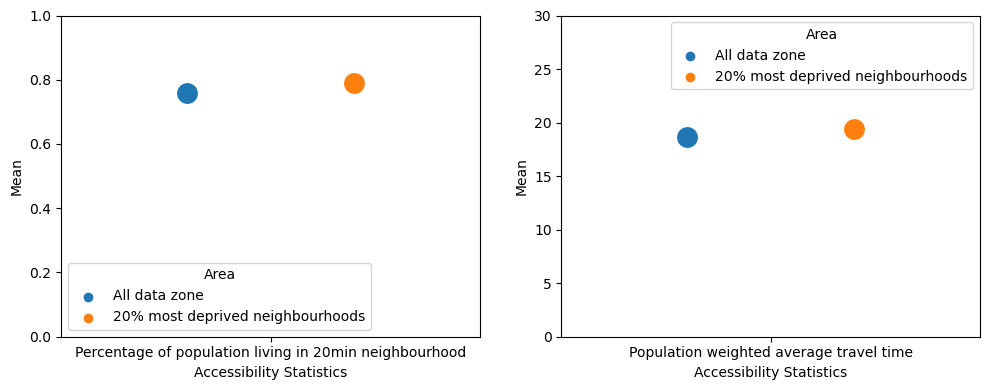

In [67]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First subplot
sns.stripplot(ax=axes[0], data=Statistics_description[Statistics_description['Accessibility Statistics'] ==
                                                   'Percentage of population living in 20min neighbourhood'],
            x='Accessibility Statistics', y='Mean',
            hue='Area', dodge=True, size=15)

# Add labels and title to the first subplot
axes[0].set_xlabel('Accessibility Statistics')
axes[0].set_ylabel('Mean')
axes[0].set_title('')
axes[0].set_ylim(0, 1)

# Second subplot
sns.stripplot(ax=axes[1], data=Statistics_description[Statistics_description['Accessibility Statistics'] ==
                                                   'Population weighted average travel time'],
            x='Accessibility Statistics', y='Mean',
            hue='Area', dodge=True, size=15)

# Add labels and title to the second subplot
axes[1].set_xlabel('Accessibility Statistics')
axes[1].set_ylabel('Mean')
axes[1].set_title('')
axes[1].set_ylim(0, 30)

# Show the subplots
plt.tight_layout()
plt.show()


### 6.4 Gini Index Accessibility within 20% most deprived neighbourhoods